Comparing the resolution of Aemulus to MDPL2, since there seems to be inconsistanceis with the Delta Sigma measurements

In [1]:
import numpy as np
from pearce.emulator import LemonPepperWet

/home/users/swmclau2/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from GPy.kern import *

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
mdpl2_xi_gm = np.load('/home/users/swmclau2/Git/pearce/bin/mock_measurements/HOD3mock_xi_gm.npy')

In [5]:
rbins = np.logspace(-1, 1.6, 19)
rbc = (rbins[1:]+rbins[:-1])/2.0

In [8]:
emu = LemonPepperWet('/scratch/users/swmclau2/xi_gm_zheng07/PearceXigmCosmo.hdf5',fixed_params = {'z':0.0})

 /home/users/swmclau2/.local/lib/python2.7/site-packages/GPy-1.9.9-py2.7-linux-x86_64.egg/GPy/models/gp_kronecker_gaussian_regression.py:82: RuntimeWarning:overflow encountered in multiply
 /share/software/user/open/py-numpy/1.14.3_py27/lib/python2.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning:overflow encountered in reduce
 /home/users/swmclau2/.local/lib/python2.7/site-packages/GPy-1.9.9-py2.7-linux-x86_64.egg/GPy/models/gp_kronecker_gaussian_regression.py:114: RuntimeWarning:overflow encountered in square


Optimization restart 1/5, f = -4545810.57745
Optimization restart 2/5, f = -4544084.92436
Optimization restart 3/5, f = -4543878.79776
Optimization restart 4/5, f = -4544527.89351
Optimization restart 5/5, f = -4551640.70495


In [9]:
all_emu_xi_gm = emu.y+emu._y_mean

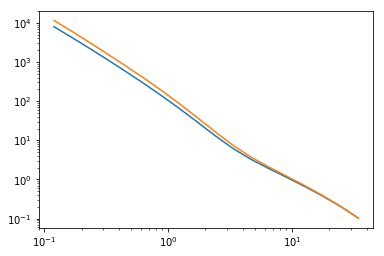

In [10]:
plt.plot(rbc, mdpl2_xi_gm, label = '')
plt.plot(rbc, (10**all_emu_xi_gm).mean(axis=(0,1)))
plt.loglog();

In [11]:
h = 0.6777
#cosmo_pnames = ['ombh2', 'omch2', 'w0', 'ns', 'H0', 'Neff', 'sigma8']
#cosmo_true_vals = np.array([0.048206*h**2, 0.307115*h**2,\
#                            -1, 0.9667, \
#                        h*100, 3.046, 0.8228]) #mdpl2

cosmo_true_vals = np.array([0.048206*h**2, 0.307115*h**2-0.048206*h**2,\
                            -1, 0.9667, 3.044,\
                        h*100, 3.046]) #mdpl2

In [12]:
hod_true_vals = [0.0, 13.2, 0.2, 0.0, 14.2, 1.083, 1.0]

In [13]:
true_param_dict = dict(zip(emu.get_param_names(), np.r_[cosmo_true_vals, hod_true_vals]))

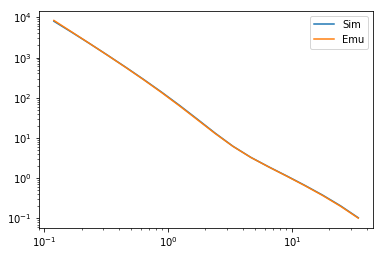

In [19]:
plt.plot(rbc, mdpl2_xi_gm, label = 'Sim')
plt.plot(rbc, 10**emu.emulate_wrt_r(true_param_dict, r_bin_centers=rbc).squeeze(), label = 'Emu')
plt.legend(loc='best')
plt.loglog();

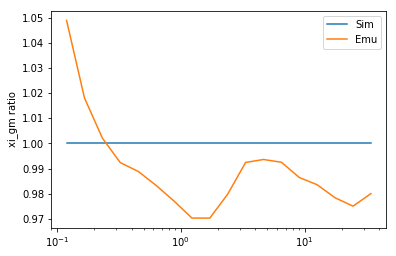

In [22]:
plt.plot(rbc, np.ones_like(mdpl2_xi_gm), label = 'Sim')
plt.plot(rbc, (10**emu.emulate_wrt_r(true_param_dict, r_bin_centers=rbc).squeeze()/mdpl2_xi_gm), label = 'Emu')
plt.legend(loc='best')
plt.ylabel('xi_gm ratio')
plt.xscale('log');

In [16]:
true_param_dict

{'H0': 67.77,
 'Neff': 3.046,
 'alpha': 1.083,
 'conc_gal_bias': 1.0,
 'ln10As': 3.044,
 'logM0': 13.2,
 'logM1': 14.2,
 'mean_occupation_centrals_assembias_corr1': 0.0,
 'mean_occupation_satellites_assembias_corr1': 0.0,
 'ns': 0.9667,
 'ombh2': 0.022139921041739997,
 'omch2': 0.11891102387661,
 'sigma_logM': 0.2,
 'w0': -1.0}